In [338]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt                                        #Imporing Libraries
import seaborn as sns  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, make_scorer, fbeta_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV


In [339]:
Advertising_Data= pd.read_csv("Advertising.csv")        # Importing dataset
Advertising_Data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 0:53,0.0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 1:39,0.0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35,0.0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 2:31,0.0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 3:36,0.0


In [340]:
Advertising_Data.info()                                     # Understanding Data and its datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1018 entries, 0 to 1017
Data columns (total 10 columns):
Daily Time Spent on Site    1018 non-null float64
Age                         1018 non-null int64
Area Income                 1018 non-null float64
Daily Internet Usage        1018 non-null float64
Ad Topic Line               1018 non-null object
City                        1018 non-null object
Male                        1018 non-null int64
Country                     1018 non-null object
Timestamp                   1018 non-null object
Clicked on Ad               1014 non-null float64
dtypes: float64(4), int64(2), object(4)
memory usage: 79.6+ KB


In [341]:
Advertising_Data.shape         

(1018, 10)

In [342]:
Advertising_Data.isnull().sum()                     # Clicked on Ad has 4 missing values

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               4
dtype: int64

In [343]:
Advertising_Data= Advertising_Data.dropna()          # Removing the records which has missing values

In [344]:
Advertising_Data.shape

(1014, 10)

In [345]:
Advertising_Data.duplicated().sum()                         # Checking for duplicates

7

In [346]:
Advertising_Data=Advertising_Data.drop_duplicates()            # Dropping duplicates

In [347]:
Advertising_Data.shape

(1007, 10)

In [348]:
Advertising_Data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000
mean,64.952403,36.958292,54899.398868,179.386514,0.482622,0.502483
std,15.850441,31.729539,13458.555374,44.548765,0.499946,0.500242
min,32.600000,-25.000000,13996.500000,23.640000,0.000000,0.000000
25%,51.270000,29.000000,46899.780000,138.490000,0.000000,0.000000
50%,68.100000,35.000000,56984.090000,182.200000,0.000000,1.000000
75%,78.535000,42.000000,65350.775000,218.550000,1.000000,1.000000
max,91.430000,999.000000,79484.800000,269.960000,1.000000,1.000000


In [349]:
Advertising_Data['Age']=Advertising_Data['Age'].abs()    # Age cannot be negative and taking absolute of it

In [350]:
Advertising_Data.describe()


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000
mean,64.952403,37.007944,54899.398868,179.386514,0.482622,0.502483
std,15.850441,31.671555,13458.555374,44.548765,0.499946,0.500242
min,32.600000,8.000000,13996.500000,23.640000,0.000000,0.000000
25%,51.270000,29.000000,46899.780000,138.490000,0.000000,0.000000
50%,68.100000,35.000000,56984.090000,182.200000,0.000000,1.000000
75%,78.535000,42.000000,65350.775000,218.550000,1.000000,1.000000
max,91.430000,999.000000,79484.800000,269.960000,1.000000,1.000000


In [351]:
Advertising_Data[Advertising_Data['Age']<18]

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
823,43.16,8,25371.52,156.11,Implemented didactic support,Williamsport,1,Marshall Islands,2016-07-06 3:40,1.0


In [352]:
Advertising_Data[Advertising_Data['Age']>80]

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
495,50.6,999,34191.13,129.88,Realigned reciprocal framework,New Daniellefort,1,United States of America,2016-05-03 12:57,1.0
604,57.2,103,57739.03,110.66,Innovative maximized groupware,East Heatherside,0,New Zealand,2016-03-19 11:09,1.0


In [353]:
Advertising_Data=Advertising_Data[(Advertising_Data['Age']>18) & (Advertising_Data['Age']<80)]  # Keeping data whose age is greater than 18 and less than 80

In [354]:
Advertising_Data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 0:53,0.0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 1:39,0.0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35,0.0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 2:31,0.0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 3:36,0.0


In [355]:
Advertising_Data.shape

(1004, 10)

In [356]:
Advertising_Data['Clicked on Ad'].value_counts()/len(Advertising_Data)   # Both Clicked on Ad and not clicked on Ad are equally presnt 

1.0    0.500996
0.0    0.499004
Name: Clicked on Ad, dtype: float64

In [357]:
Advertising_Data['Country'].describe()

count       1004
unique       237
top       France
freq           9
Name: Country, dtype: object

In [358]:
Advertising_Data['City'].describe()

count             1004
unique             969
top       Williamsport
freq                 3
Name: City, dtype: object

In [359]:
Advertising_Data=Advertising_Data.drop(['Ad Topic Line','City'],axis=1)

In [360]:
Advertising_Data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,0,Tunisia,2016-03-27 0:53,0.0
1,80.23,31,68441.85,193.77,1,Nauru,2016-04-04 1:39,0.0
2,69.47,26,59785.94,236.50,0,San Marino,2016-03-13 20:35,0.0
3,74.15,29,54806.18,245.89,1,Italy,2016-01-10 2:31,0.0
4,68.37,35,73889.99,225.58,0,Iceland,2016-06-03 3:36,0.0


In [361]:
def time_section(x):
    a= x.split()
    return a[1]

In [362]:
Advertising_Data['Timestamp']=Advertising_Data['Timestamp'].apply(lambda y : time_section(y))

In [363]:
def convert_to_minutes(value):
    hours, minutes = value.split(':')
    return int(hours) * 60 + int(minutes)

In [364]:
Advertising_Data['Timestamp'] = Advertising_Data['Timestamp'].apply(convert_to_minutes)

In [365]:
Advertising_Data['Timestamp'].head()

0      53
1      99
2    1235
3     151
4     216
Name: Timestamp, dtype: int64

In [366]:
Advertising_Data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,0,Tunisia,53,0.0
1,80.23,31,68441.85,193.77,1,Nauru,99,0.0
2,69.47,26,59785.94,236.50,0,San Marino,1235,0.0
3,74.15,29,54806.18,245.89,1,Italy,151,0.0
4,68.37,35,73889.99,225.58,0,Iceland,216,0.0


###### Visualisation

Text(0.5, 1.0, 'People Clicked on Ad')

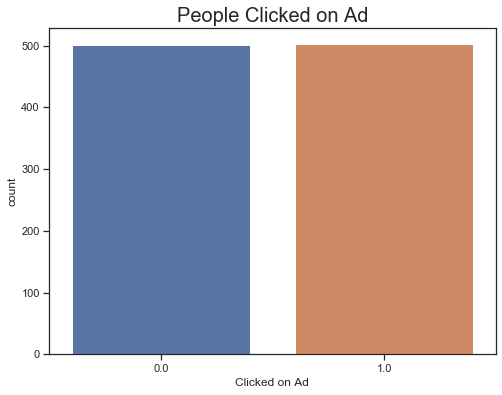

In [367]:
fig_dims = (8, 6)
fig, ax = plt.subplots(figsize=fig_dims)                                                           
                                                                                  
sns.set(style="ticks", palette="pastel")                                               
sns.countplot(x='Clicked on Ad',data=Advertising_Data,palette='deep',ax=ax)
ax.set_title('People Clicked on Ad',size=20)


Text(0.5, 1.0, 'People Clicked on Ad')

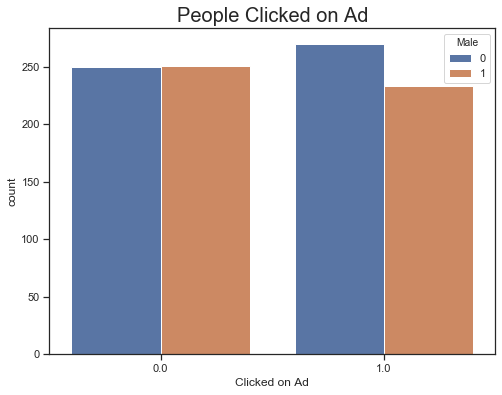

In [368]:
fig_dims = (8, 6)
fig, ax = plt.subplots(figsize=fig_dims)                                               
              
sns.set(style="ticks", palette="pastel")                                               
sns.countplot(x='Clicked on Ad',hue='Male', data=Advertising_Data,palette='deep',ax=ax)
ax.set_title('People Clicked on Ad',size=20)


In [369]:
def data_info(data):
    return data.info()

def distplot(size,features,data):
    plt.figure(figsize=size)
    for i in range(len(features)):
        plt.subplot(5, 3, i+1)
        sns.distplot(data[features[i]])

def boxplot(size, features, target, data):
    plt.figure(figsize=size)
    for i in range(len(num_cols)):
        plt.subplot(5,3,i+1)
        sns.boxplot(x= target,y=features[i],data=data)
    
    
def crossCorrelation(data):
    corr = data.corr()
    plt.figure(figsize=(10,6))
    sns.heatmap(corr, 
          xticklabels=corr.columns.values,
          yticklabels=corr.columns.values)
    print(corr)

In [370]:
data_info(Advertising_Data)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1004 entries, 0 to 1017
Data columns (total 8 columns):
Daily Time Spent on Site    1004 non-null float64
Age                         1004 non-null int64
Area Income                 1004 non-null float64
Daily Internet Usage        1004 non-null float64
Male                        1004 non-null int64
Country                     1004 non-null object
Timestamp                   1004 non-null int64
Clicked on Ad               1004 non-null float64
dtypes: float64(4), int64(3), object(1)
memory usage: 110.6+ KB


In [371]:
target = "Clicked on Ad"

In [372]:
num_cols=Advertising_Data.select_dtypes(exclude=['object']).columns

In [373]:
num_cols

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male', 'Timestamp', 'Clicked on Ad'],
      dtype='object')

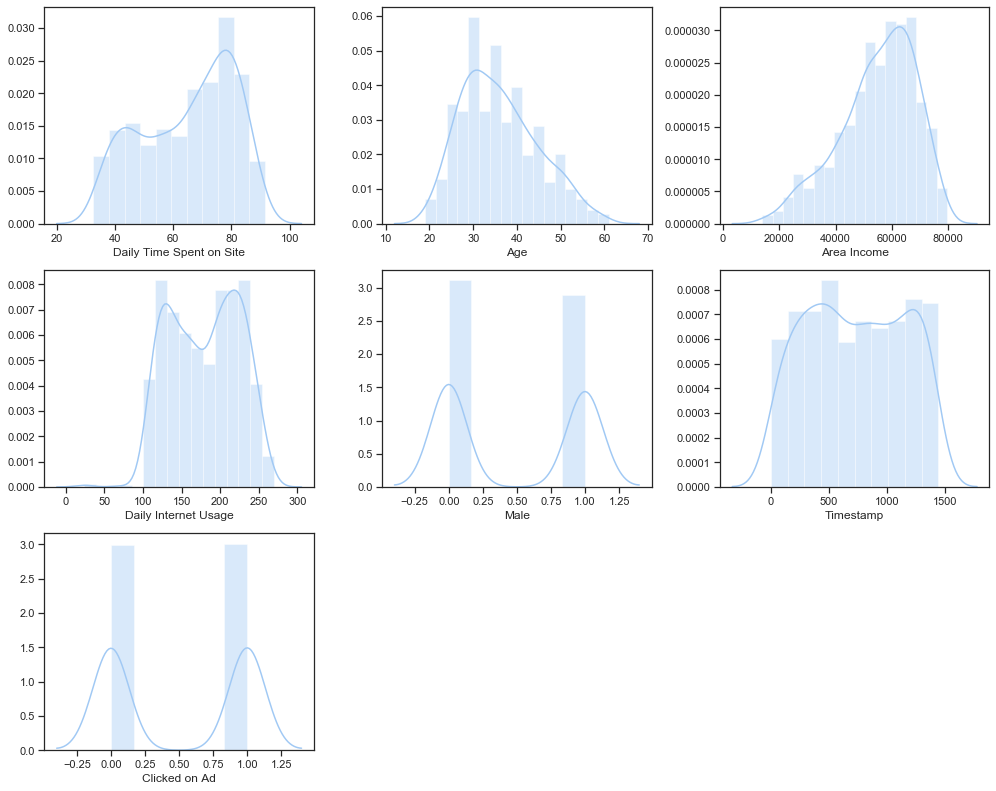

In [374]:
distplot((14,18),num_cols,Advertising_Data)
plt.tight_layout()

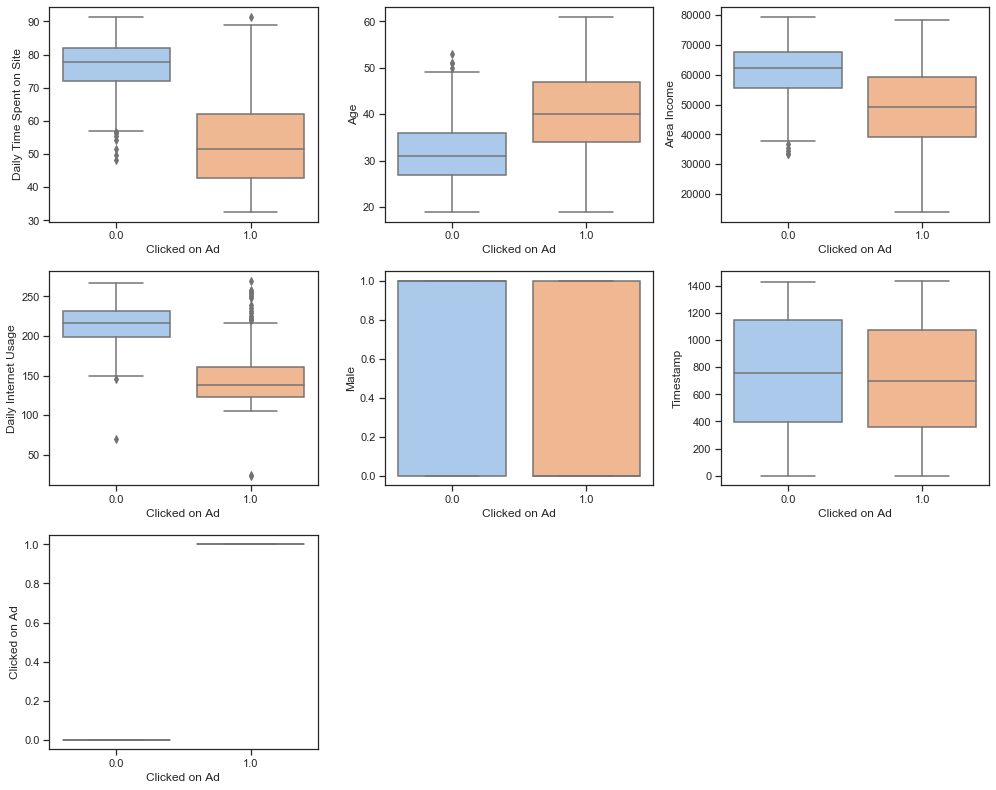

In [375]:
boxplot((14,18),num_cols,target, Advertising_Data)
plt.tight_layout()

                          Daily Time Spent on Site       Age  Area Income  \
Daily Time Spent on Site                  1.000000 -0.331524     0.311030   
Age                                      -0.331524  1.000000    -0.184800   
Area Income                               0.311030 -0.184800     1.000000   
Daily Internet Usage                      0.510431 -0.365607     0.343434   
Male                                     -0.018013 -0.017985    -0.001521   
Timestamp                                 0.002691 -0.054315     0.035043   
Clicked on Ad                            -0.748264  0.492161    -0.477774   

                          Daily Internet Usage      Male  Timestamp  \
Daily Time Spent on Site              0.510431 -0.018013   0.002691   
Age                                  -0.365607 -0.017985  -0.054315   
Area Income                           0.343434 -0.001521   0.035043   
Daily Internet Usage                  1.000000  0.018861   0.071732   
Male                        

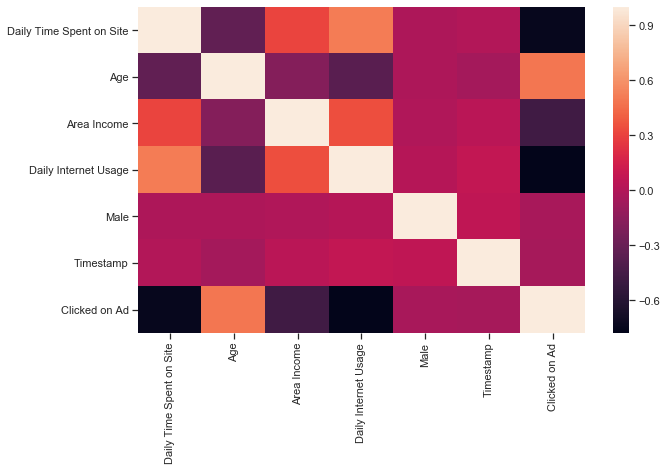

In [376]:
crossCorrelation(Advertising_Data)

In [377]:
country_table=pd.crosstab (index=Advertising_Data['Country'], columns= "count")
country_table.sort_values(by="count",ascending=False).head(10)

col_0,count
Country,
France,9
Czech Republic,9
Afghanistan,8
Australia,8
Turkey,8
South Africa,8
Senegal,8
Peru,8
Micronesia,8


In [378]:
table_clicked_country = pd.crosstab(Advertising_Data['Country'],Advertising_Data['Clicked on Ad'], rownames=['Country'],colnames=["Clicked on Ad"])
table_clicked_country.sort_values(1,0,ascending=False).head(10)

Clicked on Ad,0.0,1.0
Country,,
Australia,1,7
Turkey,1,7
Ethiopia,0,7
Liberia,2,6
South Africa,2,6
Liechtenstein,0,6
Senegal,3,5
Peru,3,5
Mayotte,1,5


In [379]:

Advertising_Data['log_Age']=np.log(Advertising_Data['Age']) # Taking log Transformation for Age as it is right skewed 

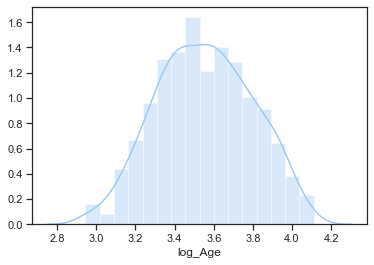

In [380]:
sns.distplot(Advertising_Data['log_Age'])

In [381]:
Advertising_Data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Country,Timestamp,Clicked on Ad,log_Age
0,68.95,35,61833.90,256.09,0,Tunisia,53,0.0,3.555348
1,80.23,31,68441.85,193.77,1,Nauru,99,0.0,3.433987
2,69.47,26,59785.94,236.50,0,San Marino,1235,0.0,3.258097
3,74.15,29,54806.18,245.89,1,Italy,151,0.0,3.367296
4,68.37,35,73889.99,225.58,0,Iceland,216,0.0,3.555348


In [382]:
num_vars= [ 'Daily Time Spent on Site','Area Income','Daily Internet Usage','log_Age','Male','Timestamp']
cat_vars=['Country']
target=['Clicked on Ad']             # Splitting variables in to numerical, categorical and target

In [383]:

scaler = MinMaxScaler()                                                 #Applying MinMax Scaler to thenumerical features
data = pd.DataFrame(data = Advertising_Data)                            # This makes the features to transform valuesin between (0,1) 
data[num_vars] = scaler.fit_transform(data[num_vars])
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Country,Timestamp,Clicked on Ad,log_Age
0,0.617882,35,0.730472,0.943691,0.0,Tunisia,0.036831,0.0,0.523740
1,0.809621,31,0.831375,0.690687,1.0,Nauru,0.068798,0.0,0.419696
2,0.626721,26,0.699200,0.864160,0.0,San Marino,0.858235,0.0,0.268903
3,0.706272,29,0.623160,0.902282,1.0,Italy,0.104934,0.0,0.362521
4,0.608023,35,0.914568,0.819828,0.0,Iceland,0.150104,0.0,0.523740


In [384]:
#data= pd.get_dummies(data)
#data.head()

In [385]:
                                                                                                #Train test split 
X, y = data.drop(["Clicked on Ad", "Age","Country"],1).values, data["Clicked on Ad"].values     # Train set 80% and test set 20%
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                  test_size=0.2,
                                                  random_state=42,
                                                  stratify=y)



In [386]:
print(X_train.shape)
print(y_train.shape)                                    # Checking the Training and Test set records
print(X_test.shape)
print(y_test.shape)

(803, 6)
(803,)
(201, 6)
(201,)


In [387]:


parameters = {"C": [0.001, 0.01, 0.1, 1, 10 , 100, 1000]}                #Applying Logistic Regression with L2 Norm

model = LogisticRegression(random_state=50, penalty="l2")

# fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# Grid Search on the classifier using 'scorer' as the scoring method
grid_obj = GridSearchCV(model, param_grid=parameters, scoring=scorer)

# Fitting the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Getting the estimator
best_clf = grid_fit.best_estimator_

# Making predictions using the unoptimized and model
test_predictions = best_clf.predict(X_test)

# Reporting the scores
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, test_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, test_predictions, beta = 0.5)))
print(best_clf)


Optimized Model
------
Final accuracy score on the testing data: 0.9552
Final F-score on the testing data: 0.9691
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=50, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [388]:
test_predictions


array([1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1.,
       0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1.,
       0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0.,
       1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1.,
       0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1.])

In [391]:
confmat = confusion_matrix(y_test, test_predictions)
print("The Confusion matrix:\n", confmat)
print("Precision Score:", round(precision_score(y_test, test_predictions), 2))
print("Recall Score:", round(recall_score(y_test, test_predictions), 2))

The Confusion matrix:
 [[98  2]
 [ 7 94]]
Precision Score: 0.98
Recall Score: 0.93


In [392]:
def summary_metrics(y, y_pred):
    confmat = confusion_matrix(y, y_pred)
    TP = confmat[0,0]
    FN = confmat[0,1]
    FP = confmat[1,0]
    TN = confmat[1,1]
 
    # Print the confusion matrix
    print("Confusion matrix:\n", confmat)
    print()
    
    # Print the Accuracy Score
    print("Accuracy:", round(accuracy_score(y, y_pred),2))

    # Print the Sensitivity/recall/true positive rate
    print("Sensitivity:", round(recall_score(y, y_pred),2))

    # Precision/positive predictive value
    print("Precision:", round(precision_score(y, y_pred),2))

    print("")
    print("DETAILS")
    
    # RETURN ON TP
    print("True Positive:", round((float(TP)*100),2))
    
    # Return on FP
    print("False Positive:", round((float(FP) * -1050),2))
    
    # Return on FN
    print("False Negative:", round((float(FN) * 1100),2))
    
    # Return on TN
    print("True Negative:", round((float(TN) * 0), 2))
    
    # Return on investment
    investment_return = (TP * 100) + (FP * -1050) + (FN * 1100) + (TN * 0)
    print("Profit:", round(float(investment_return),2), "$")


In [393]:
# Getting the metrics from the confusion matrix with our best model on our training set
print(summary_metrics(y_test, test_predictions))

Confusion matrix:
 [[98  2]
 [ 7 94]]

Accuracy: 0.96
Sensitivity: 0.93
Precision: 0.98

DETAILS
True Positive: 9800.0
False Positive: -7350.0
False Negative: 2200.0
True Negative: 0.0
Profit: 4650.0 $
None


Daily Time Spent on Site    0.383984
Area Income                 0.095118
Daily Internet Usage        0.390705
Male                        0.004496
Timestamp                   0.022314
log_Age                     0.103383
dtype: float64


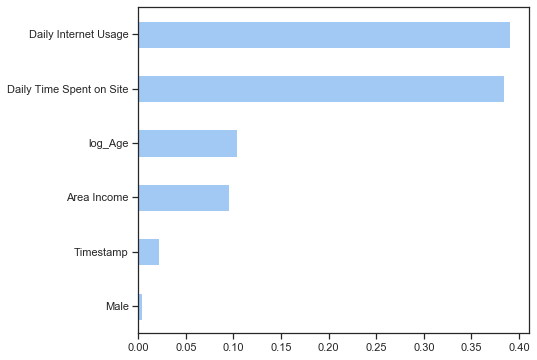

In [394]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

# Extracting feature importances from our model
feature_importances = pd.Series(model_rf.feature_importances_, index=data.drop(["Clicked on Ad", "Age","Country"],1).columns)
sub_feature_importances = feature_importances[:15]
print(sub_feature_importances)

sub_feature_importances.sort_values(inplace=True)
sub_feature_importances.plot(kind='barh', figsize=(7,6))